# Healpy Exercises

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py
import os
from astropy.coordinates import SkyCoord
import healpy as hp
import numpy as np

## Making a map out of a Catalogue

In [3]:
def cat2hpx(lon, lat, nside, convert_to_gal=True,values=None):
    """
    Convert a catalogue to a HEALPix map of either number counts per pixel
    or a mean of quantities per pixel.
    element.

    Parameters
    ----------
    lon, lat : (ndarray, ndarray)
        Coordinates of the sources in degree. If radec=True, assume input is in the icrs
        coordinate system. Otherwise assume input is glon, glat

    nside : int
        HEALPix nside of the target map

    radec : bool
        Switch between R.A./Dec and glon/glat as input coordinate system.
    values: ndarray
        A table of values of some quantity matching objects at lon, lat

    Return
    ------
    hpx_map : ndarray
        HEALPix map of the catalog counts or mean quantities

    """

    npix = hp.nside2npix(nside)

    if radec:
        eq = SkyCoord(lon, lat, unit='deg')
        l, b = eq.galactic.l.value, eq.galactic.b.value
    else:
        l, b = lon, lat

    # conver to theta, phi
    theta = np.radians(90. - b)
    phi = np.radians(l)

    # convert to HEALPix indices
    indices = hp.ang2pix(nside, theta, phi)

    idx, counts = np.unique(indices, return_counts=True)
    
    
    # fill the fullsky map
    if values is not None:
        arr =  np.array([indices,values]).T
        arr = arr[arr[:,0].argsort()]
        
        hpx_map = np.empty(npix)
        hpx_map[:] = np.nan
       
        for index in tqdm.tqdm(idx):
            hpx_map[index] = arr[arr[:,0]==index,:][:,1].mean()
            
    else:
        hpx_map = np.zeros(npix, dtype=int)
        hpx_map[idx] = counts

    return hpx_map

In [4]:
import numpy as np

In [5]:
np.degrees( 2.5/60.)

2.38732414637843

## Healpix nside to $\ell$

In [6]:
def nside2ell(nside):
    return 180/np.degrees(np.sqrt(hp.nside2pixarea(nside)))

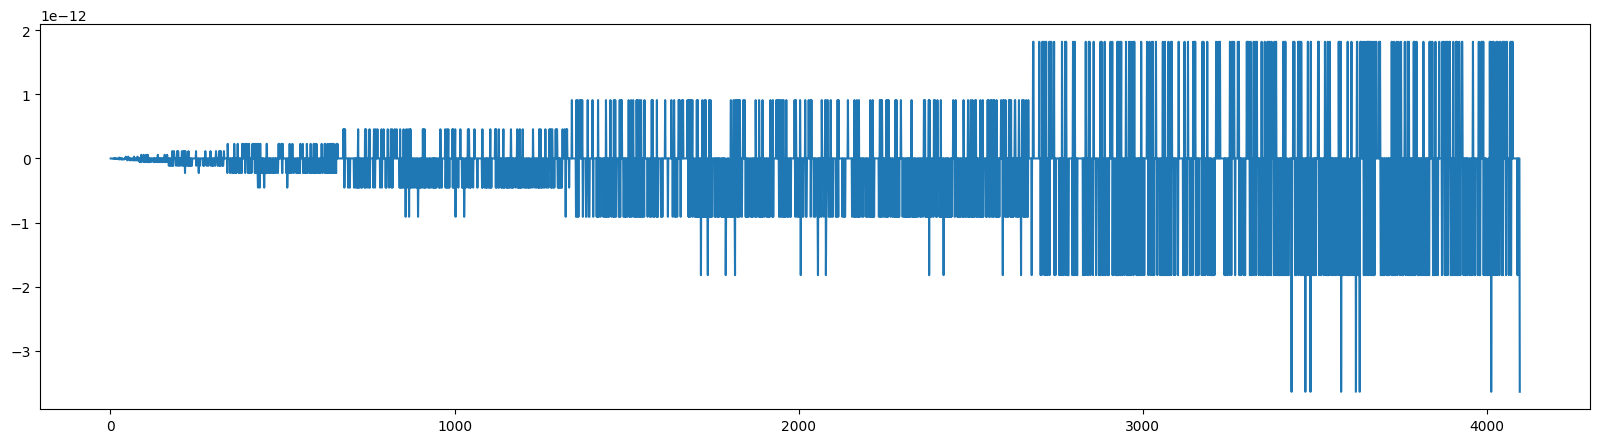

In [88]:
nsides = np.arange(1,4096)
figure(figsize(20,5))
plot(nsides,nside2ell(nsides)-np.sqrt(3*np.pi)*(nsides))